In [1]:
# Importing libraries
import pandas as pd
import datetime as dt
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading data
df = pd.read_csv(r'supermarket_sales.csv')

# Display the first few rows
print(df.shape)
df.head()

(1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Check the data types
df.info()

# Ensuring PurchaseDate is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check the data types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [8]:
# checking for null
print(df.isnull().sum())
# checking for duplicates
print(df.duplicated().sum())
# checking for duplicates in main columns
print(df['Invoice ID'].duplicated().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
0
0


In [9]:
# Checking the range of the date for frequency
df['Date'].max(),df['Date'].min()

(Timestamp('2019-03-30 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [21]:
recency_df = df.groupby(by='Invoice ID',as_index=False)['Date'].max()

recency_df.columns = ['Invoice ID','LastPurchaseDate']

recent_date = df_recency['LastPurchaseDate'].max()

recency_df['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
recency_df

,Invoice ID,LastPurchaseDate,Recency
0,101-17-6199,2019-03-13,17
1,101-81-4070,2019-01-17,72
2,102-06-2002,2019-03-20,10
3,102-77-2261,2019-03-05,25
4,105-10-6182,2019-02-27,31
...,...,...,...
995,894-41-5205,2019-01-19,70
996,895-03-6665,2019-02-16,42
997,895-66-0685,2019-03-05,25
998,896-34-0956,2019-01-26,63


In [15]:
frequency_df = df.drop_duplicates().groupby(by=['Invoice ID'], as_index=False)['Date'].count()
frequency_df.columns = ['Invoice ID', 'Frequency']

frequency_df.head()

,Invoice ID,Frequency
0,101-17-6199,1
1,101-81-4070,1
2,102-06-2002,1
3,102-77-2261,1
4,105-10-6182,1


In [18]:
df['Total'] = df["Total"]
monetary_df = df.groupby(by="Invoice ID", as_index=False)["Total"].sum()
monetary_df.columns = ["Invoice ID", "Monetary"]
monetary_df.head()

,Invoice ID,Monetary
0,101-17-6199,336.5565
1,101-81-4070,131.9220
2,102-06-2002,132.5625
3,102-77-2261,480.0285
4,105-10-6182,45.1080


In [23]:
# Merge Recency, Frequency, and Monetary dataframes
rfm_df = recency_df.merge(frequency_df, on='Invoice ID').merge(monetary_df, on='Invoice ID')

# Display the RFM table
rfm_df.head()

,Invoice ID,LastPurchaseDate,Recency,Frequency,Monetary
0,101-17-6199,2019-03-13,17,1,336.5565
1,101-81-4070,2019-01-17,72,1,131.9220
2,102-06-2002,2019-03-20,10,1,132.5625
3,102-77-2261,2019-03-05,25,1,480.0285
4,105-10-6182,2019-02-27,31,1,45.1080


In [24]:
rfm_df["R_rank"] = rfm_df["Recency"].rank(ascending=False)
rfm_df["F_rank"] = rfm_df["Frequency"].rank(ascending=True)
rfm_df["M_rank"] = rfm_df["Monetary"].rank(ascending=True)

#normalizing the rank of the customers
rfm_df["R_rank_norm"] = (rfm_df["R_rank"]/rfm_df["R_rank"].max())*100
rfm_df["F_rank_norm"] = (rfm_df["F_rank"]/rfm_df["F_rank"].max())*100
rfm_df["M_rank_norm"] = (rfm_df["M_rank"]/rfm_df["M_rank"].max())*100

rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)

rfm_df.head()

,Invoice ID,LastPurchaseDate,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,101-17-6199,2019-03-13,17,1,336.5565,81.758794,100.0,61.3
1,101-81-4070,2019-01-17,72,1,131.9220,17.085427,100.0,26.5
2,102-06-2002,2019-03-20,10,1,132.5625,89.849246,100.0,26.7
3,102-77-2261,2019-03-05,25,1,480.0285,72.160804,100.0,75.8
4,105-10-6182,2019-02-27,31,1,45.1080,64.572864,100.0,6.0


In [29]:

# Calculate the weighted RFM score
rfm_df["RFM_Score"] = 0.45 * rfm_df['R_rank_norm'] + 0.10 * rfm_df["F_rank_norm"] + 0.45 * rfm_df['M_rank_norm']

# Scale the RFM score
rfm_df["RFM_Score"] *= 0.05

# Round the RFM scores to 2 decimal places
rfm_df = rfm_df.round(2)

# Display the first 7 rows with CustomerID and RFM_Score
rfm_df[["Invoice ID", 'RFM_Score']].head(7)

,Invoice ID,RFM_Score
0,101-17-6199,3.72
1,101-81-4070,1.48
2,102-06-2002,3.12
3,102-77-2261,3.83
4,105-10-6182,2.09
5,105-31-1824,3.07
6,106-35-6779,3.10


In [30]:
# Checking the stats
rfm_df[['RFM_Score']].describe()

,RFM_Score
count,1000.000000
mean,2.757860
std,0.910999
min,0.630000
25%,2.090000
50%,2.760000
75%,3.400000
max,4.950000


In [32]:
rfm_df["Customer_segment"]=np.where(rfm_df['RFM_Score']>4.5,
                                   'Best',
                                   (np.where(
                                       rfm_df["RFM_Score"]>4,
                                       "Normal",
                                       (np.where(
                                           rfm_df["RFM_Score"]>3,
                                           "Good Customer",
                                           np.where(rfm_df["RFM_Score"]>1.5,
                                                   'Low Value Customers','Lost Customers')
                                       ))
                                   )))
rfm_df[['Invoice ID','RFM_Score',"Customer_segment"]].head(20)

,Invoice ID,RFM_Score,Customer_segment
0,101-17-6199,3.72,Good Customer
1,101-81-4070,1.48,Lost Customers
2,102-06-2002,3.12,Good Customer
3,102-77-2261,3.83,Good Customer
4,105-10-6182,2.09,Low Value Customers
5,105-31-1824,3.07,Good Customer
6,106-35-6779,3.10,Good Customer
7,109-28-2512,2.55,Low Value Customers
8,109-86-4363,3.27,Good Customer
9,110-05-6330,3.74,Good Customer


In [ ]:
#If not installed, install squarify
#pip install squarify

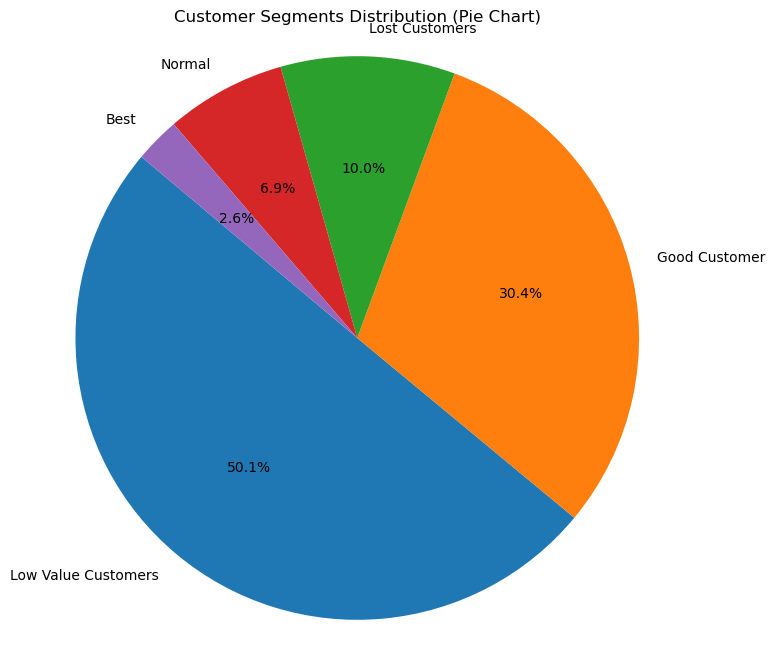

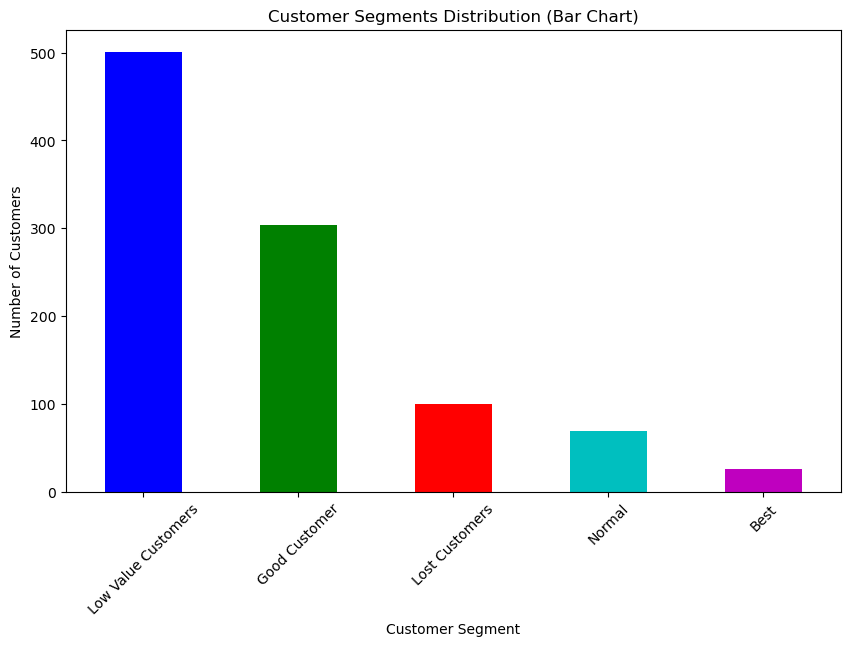

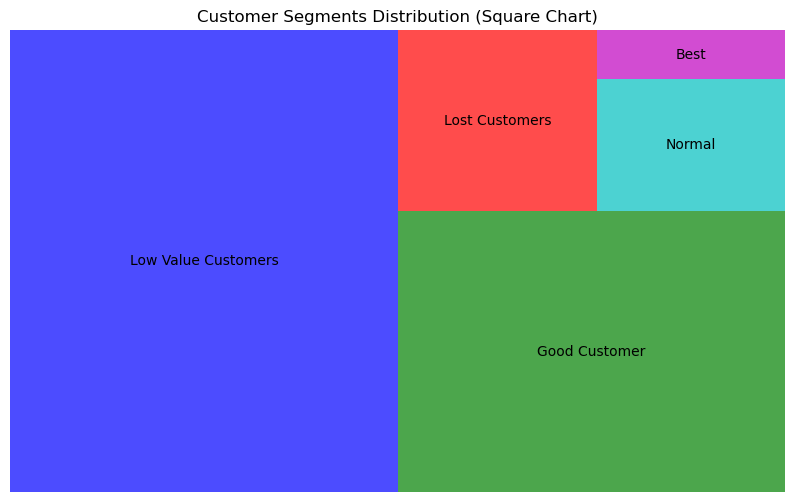

In [34]:
import squarify

# Step 1: Calculate Segment Counts
segment_counts = rfm_df['Customer_segment'].value_counts()

# Step 2: Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segments Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

# Step 3: Create Bar Chart
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar',color=('b','g','r','c','m'))
plt.title('Customer Segments Distribution (Bar Chart)')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Step 4: Create Square Chart (Treemap)
plt.figure(figsize=(10, 6))
squarify.plot(sizes=segment_counts, label=segment_counts.index, alpha=0.7,color=('b','g','r','c','m'))
plt.title('Customer Segments Distribution (Square Chart)')
plt.axis('off')
plt.show()